# Airline Analysis

In this project, we'll imagine that we work for a travel agency and need to know the ins and outs of airline prices for our clients. We want to make sure that we can find the best deal for our clients and help them understand how airline prices change based on different factors.

We decide to look into our favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?


## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


The highest value is 593.635 and The lowest value is 44.415.
The mean value is 376.59 and The median value is 380.56.


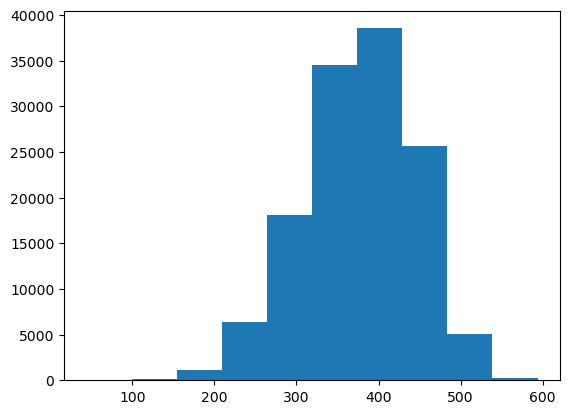

<Figure size 640x480 with 0 Axes>

In [4]:
high_value = flight.coach_price.max()
low_value = flight.coach_price.min()
mean_price = flight.coach_price.mean().round(2)
median_price = flight.coach_price.median()
print("The highest value is {}".format(high_value) + " and " + "The lowest value is {}.".format(low_value))
print("The mean value is {}".format(mean_price) + " and " + "The median value is {}.".format(median_price))
plt.hist(flight.coach_price)
plt.show()
plt.clf()

_Taking into account the high and low value and the most frequent average price (400 dollars), 500 is not a good price._

2. Now let's visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

The highest value is 593.635 and The lowest value is 170.77.
The mean value is 431.834377372817 and The median value is 437.115.


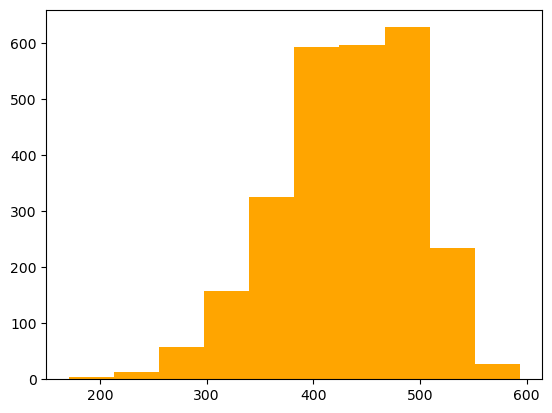

<Figure size 640x480 with 0 Axes>

In [13]:
coach_tickets_8_hoursflight = flight[flight.hours == 8]
#print(coach_tickets_8_hoursflight)
high_prices8 = coach_tickets_8_hoursflight.coach_price.max()
low_prices8 = coach_tickets_8_hoursflight.coach_price.min()
mean_prices8 = coach_tickets_8_hoursflight.coach_price.mean()
median_prices8 = coach_tickets_8_hoursflight.coach_price.median()
print("The highest value is {}".format(high_prices8) + " and " + "The lowest value is {}.".format(low_prices8))
print("The mean value is {}".format(mean_prices8) + " and " + "The median value is {}.".format(median_prices8))
plt.hist(coach_tickets_8_hoursflight.coach_price, color='orange')
plt.show()
plt.clf()

_Taking into account the mean and median prices, $500 in this Agency is still expensive._

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. We want to better understand how often there are large delays so we can correctly set up connecting flights. What kinds of delays are typical?

The mean flight delay is 13.16 minutes


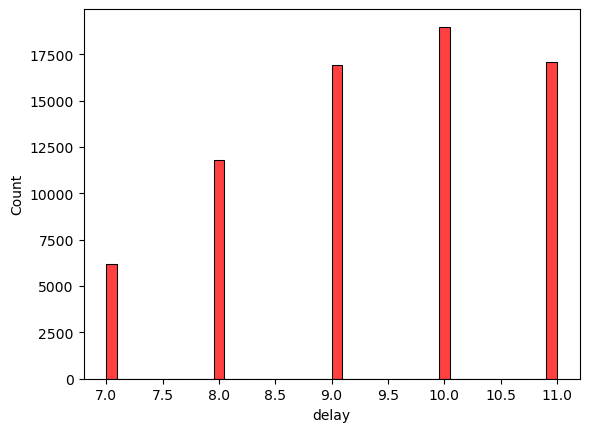

<Figure size 640x480 with 0 Axes>

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*Convert inf values to NaN before operating instead.*")

meanflightdelays = flight.delay.mean().round(2)
print("The mean flight delay is {} minutes".format(meanflightdelays))
hist_range_delay = flight[(flight.delay > 6) & (flight.delay < 12)]
sns.histplot(hist_range_delay.delay, color='red')
plt.show()
plt.clf()

_10 minutes are the typical kind of flight delays._

## Bivariate Analysis

4. Now, let's create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

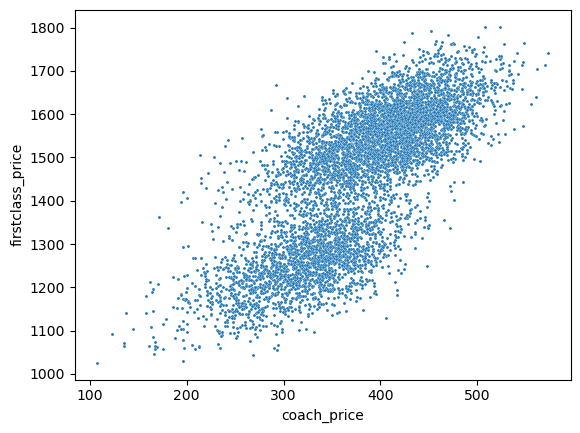

<Figure size 640x480 with 0 Axes>

In [24]:
sample_percentage = 0.05
sample_flight_data = flight.sample(n= int(flight.shape[0]*sample_percentage))
sns.scatterplot(x = sample_flight_data.coach_price, y = sample_flight_data.firstclass_price, s=5)
plt.show()
plt.clf()

### We took a sample of 5% of our big data, so it becomes easier to read our findings. Let's trace a line in our graph in order to help us with the analysis.

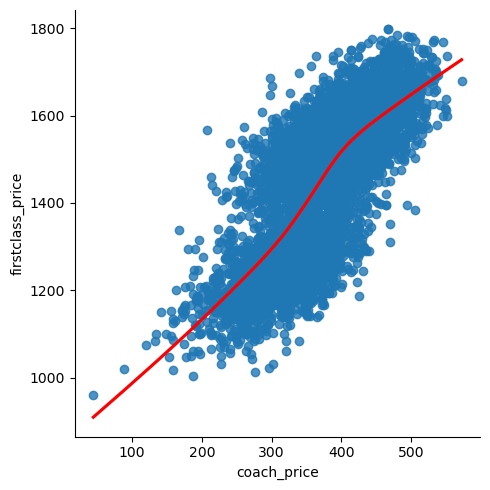

In [22]:
figure_adjusted = sns.lmplot(x='coach_price', y='firstclass_price', data=sample_flight_data, line_kws={'color': 'red'}, lowess=True)
figure_adjusted.fig.tight_layout()
plt.show()

_Is there a positive relationship between coach and first class prices? Yes, the higher the coach price, the higher the first class price._

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

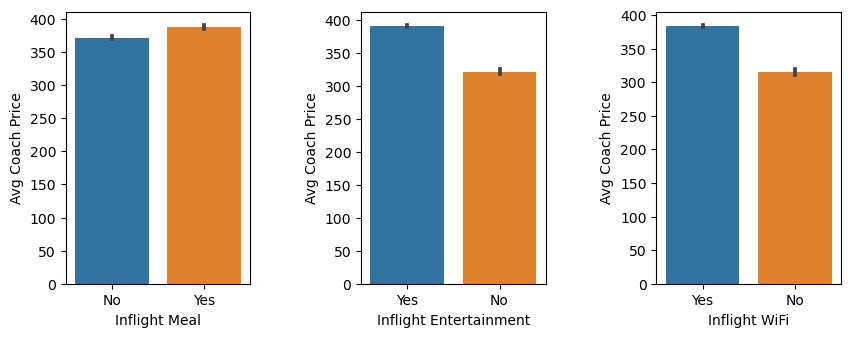

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(10, 4))
for i in range(1, 4):
  if i == 1:
    #Meal
    plt.subplot(1, 3, i)
    plt.subplots_adjust(bottom=0.2, wspace=0.6)
    sns.barplot(x='inflight_meal', y='coach_price', data=sample_flight_data)
    plt.xlabel('Inflight Meal')
    plt.ylabel('Avg Coach Price')
  elif i == 2:
    #Entertainment
    plt.subplot(1, 3, i)
    sns.barplot(x='inflight_entertainment', y='coach_price', data=sample_flight_data)
    plt.xlabel('Inflight Entertainment')
    plt.ylabel('Avg Coach Price')
  else:
    #Wifi
    plt.subplot(1, 3, i)
    sns.barplot(x='inflight_wifi', y='coach_price', data=sample_flight_data)
    plt.xlabel('Inflight WiFi')
    plt.ylabel('Avg Coach Price')
plt.show()
plt.clf()

**Inflight Meal:** _Flights that offer an inflight meal tend to have higher average coach prices compared to those without a meal. This suggests that including a meal is associated with an increase in ticket price._

**Inflight Entertainment:** _Flights with inflight entertainment also show higher average coach prices than those without. The price difference is clear, indicating that entertainment adds value to the ticket._

**Inflight WiFi:** _The presence of inflight WiFi is linked to the highest increase in average coach price among the three features. Flights with WiFi are priced significantly higher, showing that this feature is a strong driver of coach ticket prices._

6. How does the number of passengers change in relation to the length of flights?

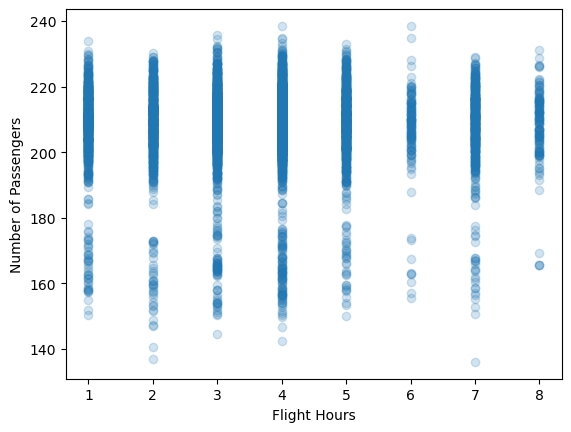

<Figure size 640x480 with 0 Axes>

In [28]:
jittered_passengers = np.random.normal(sample_flight_data.passengers, 2, size=len(sample_flight_data))
plt.scatter(sample_flight_data.hours, jittered_passengers, alpha=0.2)
plt.xlabel('Flight Hours')
plt.ylabel('Number of Passengers')
plt.show()
plt.clf()

_There are significantly fewer passengers at 6 and 8 hours compared to other hours, unless aircrafts take from around 185 up to 230 passengers._

## Multivariate Analysis

7. Now, let's visualize the relationship between coach and first-class prices on weekends compared to weekdays.

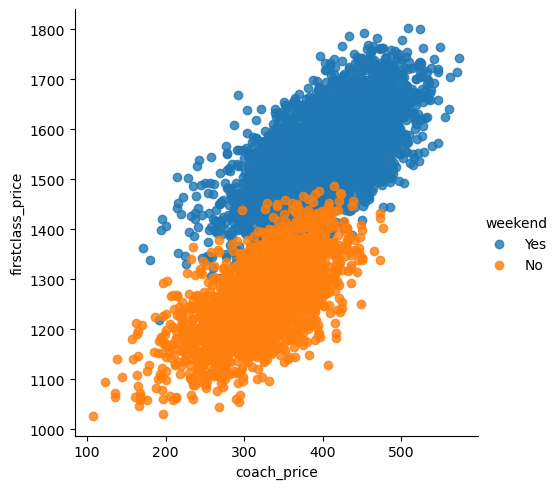

<Figure size 640x480 with 0 Axes>

In [29]:
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = sample_flight_data, fit_reg= False)
#col = 'day_of_week' show us 7 different plots for each day of the week
plt.show()
plt.clf()

_We can see that on average, weekend tickets are more expensive than weekday tickets. However, it seems that it is easier to get a good deal on a first-class ticket on a weekday (some non-weekend data points around weekend data points) than on a weekend. The price difference between first-class and coach level tickets is larger on the weekend than on a weekday._

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

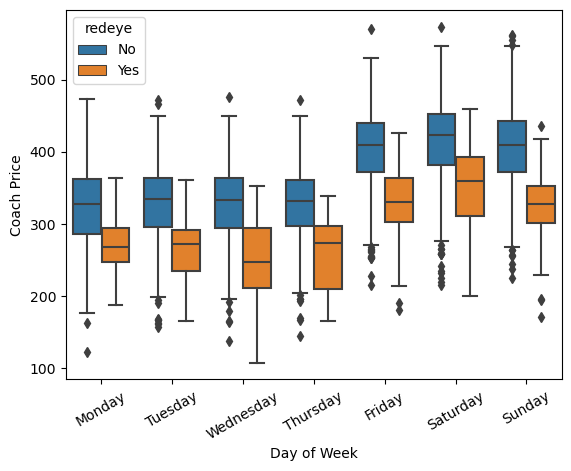

<Figure size 640x480 with 0 Axes>

In [31]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x = 'day_of_week', y = 'coach_price', hue = 'redeye', data = sample_flight_data, order=days_order)
plt.xticks(rotation=30)
plt.xlabel('Day of Week')
plt.ylabel('Coach Price')
plt.show()
plt.savefig('coach_price_vs_day_of_week.png')

_We can seem more clearly that the difference between redeyes and non-redyes flights is pretty much the same on any day of the week, although on average weekend flights cost more than weekday flights._